# Downloading NEON Data
NEON is a national network of research sites funded by the NSF. Each site has teams devoted to collecting a wide array of hydrology, biogeochemistry, and ecology data. A full list of the datasets available can be found at http://data.neonscience.org.

We will be using the R package neonUtilities, which is designed to download and combine datasets the NEON data repository. We will start by downloading a few example datasets and then give you an opportunity to download your own datasets.

In [3]:
library(neonUtilities)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Jupyter Lab and Jupyter Notebook have a default setting for the R kernel that limits the numbers of columns that can be viewed. In the case of data from NEON and other data repositories with extensive metadata, the limitation on columns can make it difficul to view your data. To change this setting, you can use the function below. This will set the maximum number of columns and rows displayed. Here the columns displayed have been set to 40 and the rows displayed has been set to 10, but these can be changed as desired.

In [4]:
options(repr.matrix.max.cols=40, repr.matrix.max.rows=10)

## Setting up your data storage space.

We need a place to save the files that you're going to download. When using bash and related terminals, the directory address _~/_ indicates the home directory for a given user. The command below creates a new directory in that home directory called _neon_data_. If the directory already exists, nothing will be changed and the _dir.create_ function will deliver a warning unless _showWarnings=FALSE_ is included in the command. We're doing this in the function below.

In [5]:
dir.create("~/neon_data", showWarnings=FALSE)

## Downloading hydrology data
We will start by downloading hydrology data including discharge, velocity, and channel geometry parameters. We will begin with discharge. Discharge. Each data product at NEON has its own unique [site](https://www.neonscience.org/field-sites/explore-field-sites) and [data](https://data.neonscience.org/data-products/explore) identifier codes that we use to specify the dataset we want to download in the code below.

We will begin by downloading hydrology data for the Arikee River (code ARIK) from the "Continuous Discharge" Data Product (DP4.00130.001).

We will use the function _loadByProduct()_ to download the data. If you have any questions about a given function, you can type _?functionName_, in this case _?loadByProduct_ into a code cell and press ctrl+Enter (or cmd+Enter for macOS users) to get help documentation for that function.

### Discharge

We will begin by loading discharge data from the Arikee River into the data object _Arik_Q_. We use the option _chec.size = FALSE_, which removes an interactive step that requires confirmation download confirmation downloading the requested data. NEON datasets are rarely more than 500 mb in size. If such datasets may cause space concerns, you can change the option to _check.size = TRUE_.

In [11]:
zipsByProduct

function (dpID, site = "all", startdate = NA, enddate = NA, package = "basic", 
    release = "current", timeIndex = "all", tabl = "all", check.size = TRUE, 
    include.provisional = FALSE, savepath = NA, load = F, token = NA_character_, 
    avg = NA) 
{
    messages <- NA
    if (!package %in% c("basic", "expanded")) {
        stop(paste(package, "is not a valid package name. Package must be basic or expanded", 
            sep = " "))
    }
    if (regexpr("DP[1-4]{1}.[0-9]{5}.00[0-9]{1}", dpID)[1] != 
        1) {
        stop(paste(dpID, "is not a properly formatted data product ID. The correct format is DP#.#####.00#", 
            sep = " "))
    }
    if (substring(dpID, 5, 5) == 3 & dpID != "DP1.30012.001") {
        stop(paste(dpID, "is a remote sensing data product. Use the byFileAOP() or byTileAOP() function.", 
            sep = " "))
    }
    if (!is.na(startdate)) {
        if (regexpr("[0-9]{4}-[0-9]{2}", startdate) != 1) {
            stop("startdate and enddate must be either NA or valid dates in the form YYYY-MM")
        }
    }
    if (!is.na(enddate)) {
        if (regexpr("[0-9]{4}-[0-9]{2}", enddate) != 1) {
            stop("startdate and enddate must be either NA or valid dates in the form YYYY-MM")
        }
    }
    if (!is.na(avg)) {
        cat("Input parameter avg is deprecated; use timeIndex to download by time interval.\n")
    }
    else {
        avg <- timeIndex
    }
    if (avg != "all" & tabl != "all") {
        stop("Either timeIndex or tabl can be specified, but not both.")
    }
    if (tabl != "all") {
        message(paste("Warning: Downloading only table ", tabl, 
            ". Downloading by table is not recommended unless you are already familiar with the data product and its contents.\n", 
            sep = ""))
        if (!tabl %in% table_types$tableName) {
            message(paste("Warning: ", tabl, " is not in list of known tables. Download will be attempted, but check name and check neonUtilities for updates.\n", 
                sep = ""))
        }
        else {
            if (!dpID %in% table_types$productID[which(table_types$tableName == 
                tabl)]) {
                message(paste(tabl, " is a table in ", paste(table_types$productID[which(table_types$tableName == 
                  tabl)], collapse = " "), ", not in ", dpID, 
                  ". Download will be attempted, but check for updates.\n", 
                  sep = ""))
            }
            if ("lab-current" %in% table_types$tableType[which(table_types$tableName == 
                tabl)] | "lab-all" %in% table_types$tableType[which(table_types$tableName == 
                tabl)]) {
                stop(paste("Download by table is not available for lab metadata tables. To get the complete dataset for table ", 
                  tabl, ", download the most recently published site and month of data for ", 
                  paste(table_types$productID[which(table_types$tableName == 
                    tabl)], collapse = " or "), ".", sep = ""))
            }
        }
    }
    if (dpID %in% c("DP1.00033.001", "DP1.00042.001")) {
        stop(paste(dpID, "is a phenological image product, data are hosted by Phenocam.", 
            sep = " "))
    }
    if (dpID %in% c("DP1.00043.001")) {
        stop(paste("Spectral sun photometer (", dpID, ") data are hosted by Aeronet.", 
            sep = ""))
    }
    if (dpID == "DP1.10017.001" & package == "expanded") {
        stop("Digital hemispherical images expanded file packages exceed R download limits. Either download from the data portal, or download the basic package and use the URLs in the data to download the images themselves. Follow instructions in the Data Product User Guide for image file naming.")
    }
    if (dpID %in% c("DP1.00007.001", "DP1.00010.001", "DP1.00034.001", 
        "DP1.00035.001", "DP1.00036.001", "DP1.00037.001", "DP1.00099.001", 
        "DP1.00100.001", "DP2.00008.001", "DP2.00009.001", "DP2.00024.001", 
     

In [6]:
Arik_Q<-loadByProduct(dpID = "DP4.00130.001",site = "ARIK", check.size = FALSE)

Finding available files
  |======================================================================| 100%
Provisional data were excluded from available files list. To download provisional data, use input parameter include.provisional=TRUE.
  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table csd_continuousDischarge
Copied the most recent publication of categoricalCodes file to /stackedFiles
Merged the most recent publication of sensor position files for each site and saved to /stackedFiles
Aggregated the science review flag files for each site and saved to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 1 data tables and 5 metadata tables!
Stacking took 12.73645 secs


The dataset you've downloaded contains continuous discharge data as well as a large amount of ancillary metadata. To start unpacking your data, use the _names_ function in R.

Note that there is a lot of data here. This includes a lot of useful metadata, but we just want to look at the discharge estimates right now. See if you can figure out from the results of the structure command the location of the continuous discharge data.

In [7]:
names(Arik_Q)

[1] "categoricalCodes_00130"      "citation_00130_RELEASE-2024"
[3] "csd_continuousDischarge"     "issueLog_00130"             
[5] "readme_00130"                "science_review_flags_00130" 
[7] "sensor_positions_00130"      "variables_00130"

You can check the contents of each of these list elements by using the command _head_ and include the name of the list _Arik_Q_ and the names of the list element that you want to view followed by a dollar sign. The command _head_ will show the first six rows of the data frame or matrix.

In [45]:
head(Arik_Q$csd_continuousDischarge)

,siteID,stationHorizontalID,namedLocation,endDate,curveID,regressionID,calibratedPressure,equivalentStage,nonSystematicUnc,systematicUnc,stageUnc,maxpostDischarge,withParaUncQLower2Std,withParaUncQUpper2Std,withRemnUncQLower2Std,withRemnUncQUpper2Std,dischargeFinalQF,dischargeFinalQFSciRvw,release
,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ARIK,102,CFGLOC101671,2016-08-12 00:00:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
2,ARIK,102,CFGLOC101671,2016-08-12 00:01:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
3,ARIK,102,CFGLOC101671,2016-08-12 00:02:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
4,ARIK,102,CFGLOC101671,2016-08-12 00:03:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
5,ARIK,102,CFGLOC101671,2016-08-12 00:04:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
6,ARIK,102,CFGLOC101671,2016-08-12 00:05:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024


The discharge time series is inclued in the dataframe "csd_continuousDischarge". Within this dataframe there are a number of columns, the one with the discharge data is called _maxpostDischarge_. The structure of online datasets from NEON and data repositories can sometimes be unintuitive. Fortunately, online repositories also include documentation. This includes a [metadata document from NEON](file:///Users/jdh/Downloads/NEON_continuousQ_userGuide_vD.1.pdf) that describes the nature of data product DP4.00130.001, continuous discharge,in detail. These can be found associated with each dataproduct at data.neonscience.org.

In [8]:
Arik_Q_cD<-Arik_Q[["csd_continuousDischarge"]]
head(Arik_Q_cD)
names(Arik_Q_cD)
Arik_Q_cD$maxpostDischarge

,siteID,stationHorizontalID,namedLocation,endDate,curveID,regressionID,calibratedPressure,equivalentStage,nonSystematicUnc,systematicUnc,stageUnc,maxpostDischarge,withParaUncQLower2Std,withParaUncQUpper2Std,withRemnUncQLower2Std,withRemnUncQUpper2Std,dischargeFinalQF,dischargeFinalQFSciRvw,release
,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ARIK,102,CFGLOC101671,2016-08-12 00:00:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
2,ARIK,102,CFGLOC101671,2016-08-12 00:01:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
3,ARIK,102,CFGLOC101671,2016-08-12 00:02:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
4,ARIK,102,CFGLOC101671,2016-08-12 00:03:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
5,ARIK,102,CFGLOC101671,2016-08-12 00:04:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024
6,ARIK,102,CFGLOC101671,2016-08-12 00:05:00,ARIK.2016,ARIK.2016.reg1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,RELEASE-2024


[1] "siteID"                 "stationHorizontalID"    "namedLocation"         
 [4] "endDate"                "curveID"                "regressionID"          
 [7] "calibratedPressure"     "equivalentStage"        "nonSystematicUnc"      
[10] "systematicUnc"          "stageUnc"               "maxpostDischarge"      
[13] "withParaUncQLower2Std"  "withParaUncQUpper2Std"  "withRemnUncQLower2Std" 
[16] "withRemnUncQUpper2Std"  "dischargeFinalQF"       "dischargeFinalQFSciRvw"
[19] "release"

[1]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [15]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [29]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [43]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [57]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [71]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [85]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [99]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [113]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [127]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [141]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [155]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [169]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [183]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [197]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [211]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [225]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [239]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [253]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [267]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [281]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [295]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [309]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [323]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [337]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [351]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [365]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [379]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [393]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [407]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [421]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [435]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [449]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [463]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [477]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [491]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [505]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [519]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [533]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [547]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [561]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [575]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [589]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [603]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [617]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [631]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [645]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [659]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [673]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [687]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [701]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [715]   NA   NA   NA   N

Now that we've found the dataset, let's plot it using the ggplot package. Fortunately, this dataset includes a formatted date/time column so plotting is easy.

Warning message:
“Removed 264183 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 762 rows containing missing values or values outside the scale range
(`geom_line()`).”


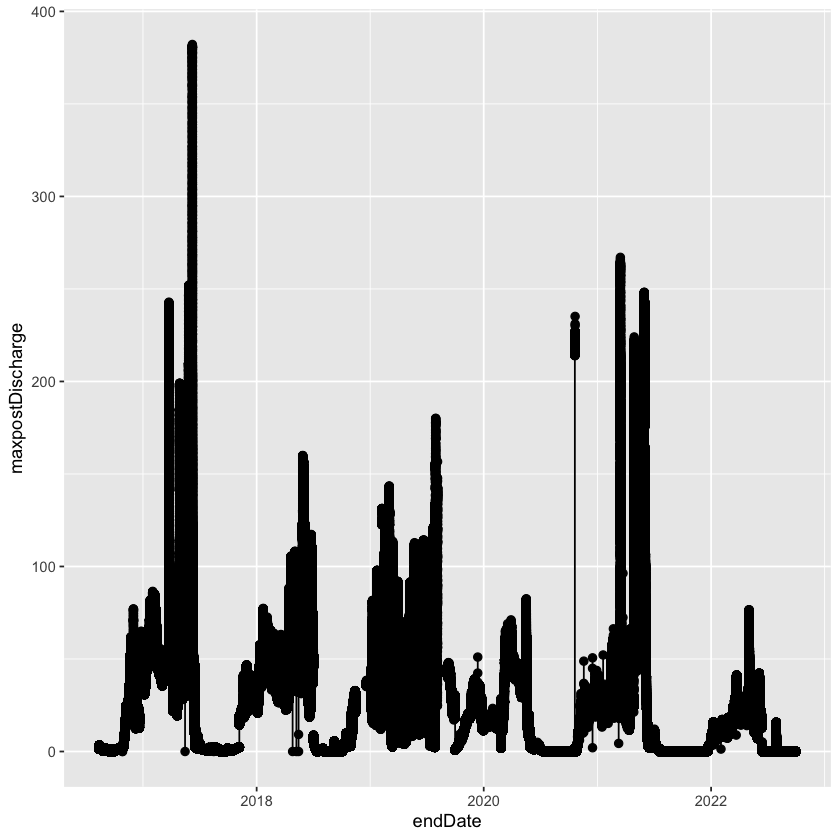

In [9]:
ggplot(Arik_Q_cD,aes(endDate,maxpostDischarge))+
geom_point(size=2)+
geom_line()

#### Try downloading from another site of your choice. Save the continuous discharge dataset in the same directory as we saved the previous file.

### Channel Geometry
Channel geometry is a useful parameter for ecological analysis and some of the analyses that we will conduct in subsequent modules. We can use NEON's [Discharge Field Collection (DP1.20048.001)](https://data.neonscience.org/data-products/DP1.20048.001) to obtain these measurements.

In [ ]:
Arik_DFC<-loadByProduct(dpID = "DP1.20048.001",site = "ARIK", check.size = FALSE)

As before, we have to use the structure command to find the data we need. If you review the NEON documentation for this dataset, you will note that field surveys are conducted with the aid of an accoustic doppler current profiler (ADCP). The results of these surveys are summarized in the  list element _dsc_individualFieldData. This is the dataframe that has the hydraulic geometry parameters we're looking for!

In [ ]:
str(Arik_DFC)
Arik_HG<-Arik_DFC$dsc_fieldDataADCP

We can use these data to assess the relationship between different hydraulic parameters.

In [ ]:
names(Arik_HG)
head(Arik_HG)
Arik_HG$Channel_Width<-Arik_HG$sectionArea/Arik_HG$waterDepth
ggplot(Arik_HG,aes(waterDepth,sectionArea))+geom_point()
ggplot(Arik_HG,aes(Channel_Width,waterDepth))+geom_point()


### Rating Curve
Finally, we want to be able to download, view, and evaluate rating curves that were used to produce continuous discharge measurements from pressure transducers. These are obtained from the [Stage-Discharge Rating Curves (DP4.00133.001)](https://data.neonscience.org/data-products/DP4.00133.001) dataset.

In [ ]:
Arik_RC<-loadByProduct(dpID = "DP4.00133.001",site = "ARIK", check.size = FALSE)

In [ ]:
str(Arik_RC)

In [ ]:
Arik_DC<-Arik_RC$sdrc_gaugeDischargeMeas
names(Arik_DC)
str(Arik_DC)
head(Arik_DC)

In [ ]:
ggplot(Arik_DC,aes(gaugeHeight,streamDischarge))+geom_point()

## Water Chemistry Data
There are two types of water chemistry data available from NEON and other portals. There are individually collected grab samples as well as continuously collected sensor data. Both types of data have their own advantages and drawbacks and are most useful when collected side-by-side. NEON collects a variety of grab samples and also deploys a number of _in situ_ water sensors.

Grab samples collected include [water quality/chemistry (anions, cations, conductivity, pH, and various forms of carbon and
nutrients including total, dissolved and particulates)](https://data.neonscience.org/data-products/DP1.20093.001), dissolved gasses (nitrous oxide, methane, carbon dioxide), and surface water stable isotopes ()

Sensors deployed for _in situ_ data collection include a [YSI EXO 2 Multiparameter Sonde (temperature, conductance, pH, fluorescence dissolved organic matter (fDOM), dissolved oxygen)](https://data.neonscience.org/data-products/DP1.20288.001), [SUNA V2 Nitrate Sensor (nitrate, absorbance at 254 nm)](https://data.neonscience.org/data-products/DP1.20033.001).

### Grab Sample Data
We will download grab sample data, again using the Arikee River site as our example.

In [ ]:
Arik_WC<-loadByProduct(dpID = "DP1.20093.001",site = "ARIK", check.size = FALSE)

In [ ]:
str(Arik_WC)

Let's extract nitrate, chloride, and pH values and plot these over time!

There are two datasets of interest, the first contains data collected by the local NEON domain (swc_domainLabData), the second contains data collected by an externally contracted lab (swc_externalLabDataByAnalyte), we're going to extract both of these datasets.

In [ ]:
Arik_DomainWC<-Arik_WC$swc_domainLabData
Arik_ExternalWC<-Arik_WC$swc_externalLabDataByAnalyte

In [ ]:
names(Arik_DomainWC)
head(Arik_DomainWC)
names(Arik_ExternalWC)
head(Arik_ExternalWC)

As you can see, most of the water chemistry data are contained in the Arik_ExternalWC dataset. You can examine the analyte for each dataset by accessing the columns as shown in the cell below. Let's plot iron (Fe) and Nitrate/Nitrate (NO3+NO2 - N) values over time

In [ ]:
unique(Arik_ExternalWC$analyte)

In [ ]:
Arik_WC_Plot<-subset(Arik_ExternalWC,analyte=="Fe" | analyte =="NO3+NO2 - N")
ggplot(Arik_WC_Plot,aes(x=collectDate,y=analyteConcentration,color=analyte))+
    geom_point(size=2)+
    facet_wrap(.~analyte,ncol=1,scales="free_y")

### Photosynthetically Active Radiation Data
Photosynthetically active radiation (PAR) is a key input for many ecosystem models that involve photosynthesis. Given the importance of these data to future models, we will learn how to download these data here.

### Continuous Sensor Data
Now we will practice downloading, extracting, and plotting _in situ_ sensor data using the Water Quality (DP1.20288.001) dataset. First we will download the dataset and examine its structure. For the YSI EXO 2 water quality data, the dataframe is contained in the list as "waq_instantaneous"

In [ ]:
Arik_WQ<-loadByProduct(dpID = "DP1.20288.001",site = "ARIK", check.size = FALSE)

In [ ]:
str(Arik_WQ)
Arik_WQ_Data<-Arik_WQ$waq_instantaneous

In [ ]:
head(Arik_WQ_Data)
names(Arik_WQ_Data)

Now we can easily plot different parameters using ggplot or the plotting function of choice. In this example, we are plotting specific conductance (specificConductance) and dissolved oxygen percent saturation (localDissolvedOxygenSat). Remember, as always, you can reference the data product documentation if you are unsure about the meaning of a given variable. Caution, the dataset is large so if you plot the entire dataset this may take a moment.

In [ ]:
ggplot(Arik_WQ_Data,aes(x=startDateTime,y=specificConductance))+
    geom_point()

ggplot(Arik_WQ_Data,aes(x=startDateTime,y=localDissolvedOxygenSat))+
    geom_point()

## Biodiversity Data

### Macroinvertebrate Biodiversity Data
Macroinvertebrate diversity is a key dataset for water quality regulations. Many of the determinations regarding water quality under federal water protection laws in the United States are based on the diversity of benthic macroinvertebrates in streams and rivers.

[Macroinvertebrate collection](https://data.neonscience.org/data-products/DP1.20120.001) is conducted routinely at all NEON aquatic sites. We are going to download and extract macroinvertebrate species counts in preparation for 

In [4]:
ARIK_MI<-loadByProduct(dpID = "DP1.20120.001",site = "ARIK", check.size = FALSE)

Finding available files
  |======================================================================| 100%
Provisional data were excluded from available files list. To download provisional data, use input parameter include.provisional=TRUE.
  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table inv_fieldData
Stacking table inv_persample
Stacking table inv_taxonomyProcessed
Copied the most recent publication of validation file to /stackedFiles
Copied the most recent publication of categoricalCodes file to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 3 data tables and 4 metadata tables!
Stacking took 2.077555 secs


Again we want to look at the names of the dataset to see where the macroinvertebrate biodiversity data are located. Note the list element _inv_taxonomyProcessed_, this contains the processed taxonomy that you want to use.

In [8]:
names(ARIK_MI)

[1] "categoricalCodes_20120"      "citation_20120_RELEASE-2024"
[3] "inv_fieldData"               "inv_persample"              
[5] "inv_taxonomyProcessed"       "issueLog_20120"             
[7] "readme_20120"                "validation_20120"           
[9] "variables_20120"

As before we want to save the processed taxonomy data in a new dataframe so that it can easily be accessed in the future.

In [9]:
ARIK_MI_Diversity<-as.data.frame(ARIK_MI$inv_taxonomyProcessed)

There are many variables included in this dataset. We are particularly interested in the macroinvertebrate taxonomy. This taxonomy information includes _phylum_, _subphylum_, _class_, _subclass_, _infraclass_, _superorder_, _order_, _suborder_, _infraorder_, _superfamily_, _family_, _subfamily_, _tribe_, _subtribe_, and _genus_. In addition, _individualCount_ is a useful variable

In [11]:
names(ARIK_MI_Diversity)

[1] "uid"                      "domainID"                
 [3] "siteID"                   "namedLocation"           
 [5] "collectDate"              "identifiedDate"          
 [7] "sampleID"                 "sampleCode"              
 [9] "slideID"                  "acceptedTaxonID"         
[11] "targetTaxaPresent"        "scientificName"          
[13] "morphospeciesID"          "taxonRank"               
[15] "phylum"                   "subphylum"               
[17] "class"                    "subclass"                
[19] "infraclass"               "superorder"              
[21] "order"                    "suborder"                
[23] "infraorder"               "superfamily"             
[25] "family"                   "subfamily"               
[27] "tribe"                    "subtribe"                
[29] "genus"                    "specificEpithet"         
[31] "infraspecificEpithet"     "invertebrateLifeStage"   
[33] "sizeClass"                "sizeCategory"            
[35] "individualCount"          "subsamplePercent"        
[37] "estimatedTotalCount"      "immatureSpecimen"        
[39] "indeterminateSpecies"     "taxonRankQualifier"      
[41] "sampleCondition"          "distinctTaxon"           
[43] "identificationQualifier"  "identificationReferences"
[45] "qcChecked"                "laboratoryName"          
[47] "identifiedBy"             "identificationRemarks"   
[49] "identificationHistoryID"  "dataQF"                  
[51] "publicationDate"          "release"

We are going to select the important columns before we save this dataset.

In [12]:
ARIK_MI_Taxonomy<-ARIK_MI_Diversity[,c('phylum','subphylum','class','subclass','infraclass','superorder','order','suborder','infraorder','superfamily','family','subfamily','tribe','subtribe','genus','individualCount')]

Now we're going to save our dataset as an rds file as before. We want to keep our data organized, so we're storing it in a new sub-directory of your _neon_data_ directory called _biodiversity_.

In [19]:
dir.create("~/neon_data/biodiversity",showWarnings=FALSE)

In [ ]:
Then we can save the RDS file.

In [ ]:
saveRDS(ARIK_MI_Taxonomy,"~/neon_data/biodiversity/ARIK_MI_Taxonomy.rds")

### Fish Diversity Data

Now we want to download some fish diversity data. Referencing the [data codes](https://data.neonscience.org/data-products/explore), fish diversity data from field surveys are found in [DP1.20107.001](https://data.neonscience.org/data-products/DP1.20107.001). We will again download data from the ARIK site.

In [3]:
ARIK_Fish<-loadByProduct(dpID = "DP1.20107.001",site = "ARIK", check.size = FALSE)

Finding available files
  |======================================================================| 100%
Provisional data were excluded from available files list. To download provisional data, use input parameter include.provisional=TRUE.
  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table fsh_fieldData
Stacking table fsh_perFish
Stacking table fsh_perPass
Stacking table fsh_bulkCount
Copied the most recent publication of validation file to /stackedFiles
Copied the most recent publication of categoricalCodes file to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 4 data tables and 4 metadata tables!
Stacking took 1.173231 secs


Now let's look at the structure of the fish dataset we just downloaded using the _names_ funciton as we've done before.

In [4]:
names(ARIK_Fish)

[1] "categoricalCodes_20107"      "citation_20107_RELEASE-2024"
 [3] "fsh_bulkCount"               "fsh_fieldData"              
 [5] "fsh_perFish"                 "fsh_perPass"                
 [7] "issueLog_20107"              "readme_20107"               
 [9] "validation_20107"            "variables_20107"

Again we see a few possible options, but here _fsh_bulkCount_ is the 

In [5]:
ARIK_Fish_Taxonomy<-as.data.frame(ARIK_Fish$fsh_bulkCount)
names(ARIK_Fish_Taxonomy)

[1] "uid"                     "domainID"               
 [3] "siteID"                  "namedLocation"          
 [5] "passStartTime"           "passEndTime"            
 [7] "passNumber"              "eventID"                
 [9] "taxonID"                 "scientificName"         
[11] "morphospeciesID"         "bulkFishCount"          
[13] "actualOrEstimated"       "identificationQualifier"
[15] "identifiedBy"            "remarks"                
[17] "publicationDate"         "release"

Now let's take a look at the dataset of fish counts. Note that the format of this file is different and fish scientific names (genus and species only) are report as a single column rather than the entire taxonomy of each species with each attribute as a separate column.

In [23]:
ARIK_Fish_Taxonomy

uid,domainID,siteID,namedLocation,passStartTime,passEndTime,passNumber,eventID,taxonID,scientificName,morphospeciesID,bulkFishCount,actualOrEstimated,identificationQualifier,identifiedBy,remarks,publicationDate,release
<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
82e1e6e7-d3e2-4561-9a2e-49a529bc5758,D10,ARIK,ARIK.AOS.fish.point.06,2016-10-11 20:30:00,2016-10-12 00:00:00,3,ARIK.20161011.06.3.e-fisher,HYBHAN,Hybognathus hankinsoni,NA,9,actual,NA,hschartel@battelleecology.org,NA,20231227T013456Z,RELEASE-2024
be13ca48-b00d-449c-b7c0-bca26959d506,D10,ARIK,ARIK.AOS.fish.point.06,2017-04-11 18:20:00,2017-04-11 18:57:00,2,ARIK.20170411.06.2.e-fisher,ETHSPE,Etheostoma spectabile,NA,34,actual,NA,hschartel@battelleecology.org,NA,20231227T035826Z,RELEASE-2024
ab8b7634-d8fd-478e-8767-525a78690ac8,D10,ARIK,ARIK.AOS.fish.point.06,2017-04-11 20:00:00,2017-04-11 20:26:00,3,ARIK.20170411.06.3.e-fisher,ETHSPE,Etheostoma spectabile,NA,31,actual,NA,hschartel@battelleecology.org,NA,20231227T035826Z,RELEASE-2024
7b7ba973-739c-41bc-b1a7-fb8394d41006,D10,ARIK,ARIK.AOS.fish.point.10,2017-04-11 21:55:00,2017-04-11 22:32:00,1,ARIK.20170411.10.1.e-fisher,ETHSPE,Etheostoma spectabile,NA,17,actual,NA,hschartel@battelleecology.org,NA,20231227T035826Z,RELEASE-2024
2ebcc6da-bf17-4dce-8506-b14029031d36,D10,ARIK,ARIK.AOS.fish.point.01,2017-10-17 14:30:00,2017-10-17 15:00:00,1,ARIK.20171017.01.1.e-fisher,POESP2,Poeciliidae sp.,D10.ARIK.2017.MorphA,23,actual,cf. family,Bnance@battelleecology.org,NA,20231227T033849Z,RELEASE-2024
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47dffa8e-d421-434f-81b0-2bd5b6c47fe6,D10,ARIK,ARIK.AOS.fish.point.07,2019-10-16 14:57:00,2019-10-16 15:19:00,1,ARIK.20191016.07.1.e-fisher,GAMAFF,Gambusia affinis,NA,270,actual,NA,0000-0002-5760-9269,NA,20231227T174021Z,RELEASE-2024
9a8ce36c-c2ac-46ce-93f1-989c7bc87193,D10,ARIK,ARIK.AOS.fish.point.09,2019-10-16 16:35:00,2019-10-16 17:15:00,1,ARIK.20191016.09.1.e-fisher,GAMAFF,Gambusia affinis,NA,219,actual,NA,0000-0002-5760-9269,NA,20231227T174021Z,RELEASE-2024
f46f92f9-2622-4860-b7cb-61898d9d8091,D10,ARIK,ARIK.AOS.fish.point.09,2019-10-16 19:22:00,2019-10-16 19:55:00,2,ARIK.20191016.09.2.e-fisher,GAMAFF,Gambusia affinis,NA,220,actual,NA,0000-0002-5760-9269,NA,20231227T174021Z,RELEASE-2024


The code below will help quickly review the data you've downloaded. There are multiple rows with the same data in this dataset, so the first part of the code block below uses functions from dplyr to sum up the number of fish by scientific name. After that we plot the counts using a bar graph.

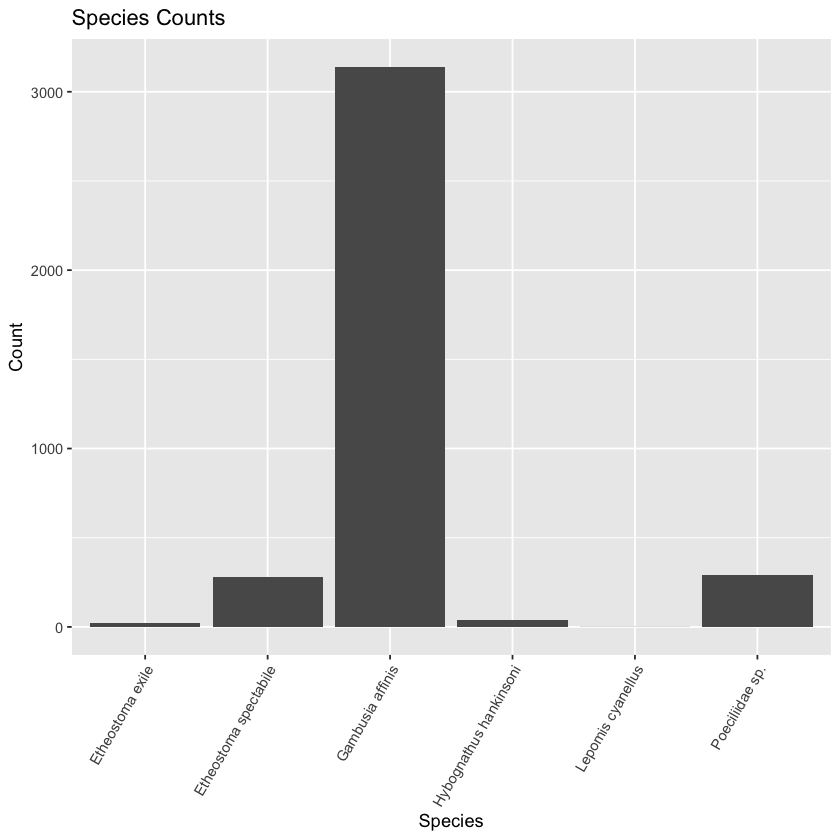

In [16]:
arik_fish_data_plot <- ARIK_Fish_Taxonomy %>%
  group_by(scientificName) %>%
  summarize(Total_Count = sum(bulkFishCount))

# Create a bar plot using ggplot2
ggplot(arik_fish_data_plot, aes(x = scientificName, y = Total_Count)) +
  geom_bar(stat = "identity") +
  labs(title = "Species Counts", x = "Species", y = "Count") +
  theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust=1))

Finally, we will save the taxonomic diversity dataframe as a RDS file as well have done before.

In [ ]:
saveRDS(ARIK_Fish_Taxonomy,"~/neon_data/biodiversity/ARIK_Fish_Taxonomy.rds")

### Microbial 

Now we want to download some microbial diversity data. Referencing the [data codes](https://data.neonscience.org/data-products/explore), aquatic benthic microbial diversity data from field surveys are found in [DP1.20086.001](https://data.neonscience.org/data-products/DP1.20086.001). Abundance data includes archaea, bacteria, and fungi. We will again download data from the ARIK site.

In [3]:
ARIK_Microbe<-loadByProduct(dpID = "DP1.20086.001",site = "ARIK", check.size = FALSE)

Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table mcc_benthicSeqVariantMetadata_16S
Stacking table mcc_benthicSeqVariantMetadata_ITS
Copied the most recent publication of validation file to /stackedFiles
Copied the most recent publication of categoricalCodes file to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 2 data tables and 4 metadata tables!
Stacking took 1.048314 secs


Looking at the names of the different list elements in the downloaded microbial community composition dataset, there are two sents of sequences, _mcc_benthicSeqVariantMetadata_16S_, which contains sequences for prokaryotes and _mcc_benthicSeqVariantMetadata_ITS_, which contains sequences for fungi. Each of these datasets includes samples from many different substrates including sand (episammon) and benthic plants (epiphyton).

In this case these two dataframes (_mcc_benthicSeqVariantMetadata_16S_ and _mcc_benthicSeqVariantMetadata_ITS_) do not contain the actual abundance data, but instead contain urls to csvs containing the relevant datasets for each individual sample. We're going to take a look at both of these datasets and then we will use a script to download all the CSVs and combine them into a single dataframe.

In [19]:
names(ARIK_Microbe)

[1] "categoricalCodes_20086"            "citation_20086_RELEASE-2024"      
[3] "issueLog_20086"                    "mcc_benthicSeqVariantMetadata_16S"
[5] "mcc_benthicSeqVariantMetadata_ITS" "readme_20086"                     
[7] "validation_20086"                  "variables_20086"

In [ ]:
ARIK_Microbe$mcc_benthicSeqVariantMetadata_16S

In [33]:
ARIK_Microbe$mcc_benthicSeqVariantMetadata_ITS

uid,domainID,siteID,plotID,namedLocation,laboratoryName,collectDate,analysisDate,sampleMaterial,geneticSampleID,geneticSampleCode,dnaSampleID,dnaSampleCode,internalLabID,sequencerRunID,downloadFileUrl,downloadFileName,codeVersion,targetGene,targetTaxonGroup,processedBy,reviewedBy,remarks,sampleFilteredReadNumber,sequenceCountQF,dataQF,publicationDate,release
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
3f6092b8-1ae4-4ef0-b0d5-923082998fb1,D10,ARIK,NA,ARIK.AOS.reach,NEON HQ,2014-07-15 18:00:00,2020-10-19,plant-associated,ARIK.20140715.AMC.EPIPHYTON.3,NA,ARIK.20140715.AMC.EPIPHYTON.3-DNA1,NA,BMI_Tube50,NA,https://storage.neonscience.org/neon-os-data/data-frame/ARIK.20140715.AMC.EPIPHYTON.3-DNA1_ITS_20201204T192324.578Z.csv,ARIK.20140715.AMC.EPIPHYTON.3-DNA1_ITS_20201204T192324.578Z.csv,NEON_mcc_sequenceVariant_analysis_v1,ITS,fungi,vWZ1qVo0h90/3iis8yKEq6Zp2YTjlO/DqY/iwBPUxZE=,NA,NA,249,Below threshold,NA,20240102T204915Z,RELEASE-2024
7c0e9b1f-4e52-4663-8d00-06dac6642fff,D10,ARIK,NA,ARIK.AOS.reach,NEON HQ,2014-07-15 18:00:00,2020-10-19,plant-associated,ARIK.20140715.AMC.EPIPHYTON.1,NA,ARIK.20140715.AMC.EPIPHYTON.1-DNA1,NA,BMI_Tube48,NA,https://storage.neonscience.org/neon-os-data/data-frame/ARIK.20140715.AMC.EPIPHYTON.1-DNA1_ITS_20201204T192324.573Z.csv,ARIK.20140715.AMC.EPIPHYTON.1-DNA1_ITS_20201204T192324.573Z.csv,NEON_mcc_sequenceVariant_analysis_v1,ITS,fungi,vWZ1qVo0h90/3iis8yKEq6Zp2YTjlO/DqY/iwBPUxZE=,NA,NA,1967,Below threshold,NA,20240102T204915Z,RELEASE-2024
77bb28ea-0636-4da6-96b6-d2d6cad77454,D10,ARIK,NA,ARIK.AOS.reach,NEON HQ,2014-07-15 18:00:00,2020-10-19,sediment,ARIK.20140715.AMC.EPIPSAMMON.1,NA,ARIK.20140715.AMC.EPIPSAMMON.1-DNA1,NA,BMI_Tube42,NA,https://storage.neonscience.org/neon-os-data/data-frame/ARIK.20140715.AMC.EPIPSAMMON.1-DNA1_ITS_20201204T192324.582Z.csv,ARIK.20140715.AMC.EPIPSAMMON.1-DNA1_ITS_20201204T192324.582Z.csv,NEON_mcc_sequenceVariant_analysis_v1,ITS,fungi,vWZ1qVo0h90/3iis8yKEq6Zp2YTjlO/DqY/iwBPUxZE=,NA,NA,55,Below threshold,NA,20240102T204915Z,RELEASE-2024
6bed916a-7dd5-47d4-8b08-25dca8dee8e9,D10,ARIK,NA,ARIK.AOS.reach,NEON HQ,2014-07-15 18:00:00,2020-10-19,sediment,ARIK.20140715.AMC.EPIPSAMMON.3,NA,ARIK.20140715.AMC.EPIPSAMMON.3-DNA1,NA,BMI_Tube43,NA,https://storage.neonscience.org/neon-os-data/data-frame/ARIK.20140715.AMC.EPIPSAMMON.3-DNA1_ITS_20201204T192324.583Z.csv,ARIK.20140715.AMC.EPIPSAMMON.3-DNA1_ITS_20201204T192324.583Z.csv,NEON_mcc_sequenceVariant_analysis_v1,ITS,fungi,vWZ1qVo0h90/3iis8yKEq6Zp2YTjlO/DqY/iwBPUxZE=,NA,NA,236,Below threshold,NA,20240102T204915Z,RELEASE-2024
c4dacf72-701e-44f7-85c2-2f4a9637dfd8,D10,ARIK,NA,ARIK.AOS.reach,NEON HQ,2014-07-15 18:00:00,2020-10-19,plant-associated,ARIK.20140715.AMC.EPIPHYTON.2,NA,ARIK.20140715.AMC.EPIPHYTON.2-DNA1,NA,BMI_Tube49,NA,https://storage.neonscience.org/neon-os-data/data-frame/ARIK.20140715.AMC.EPIPHYTON.2-DNA1_ITS_20201204T192324.576Z.csv,ARIK.20140715.AMC.EPIPHYTON.2-DNA1_ITS_20201204T192324.576Z.csv,NEON_mcc_sequenceVariant_analysis_v1,ITS,fungi,vWZ1qVo0h90/3iis8yKEq6Zp2YTjlO/DqY/iwBPUxZE=,NA,NA,409,Below threshold,NA,20240102T204915Z,RELEASE-2024
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
568e787a-78be-4bff-974b-29720407f09c,D10,ARIK,NA,ARIK.AOS.reach,NEON HQ,2018-10-15 18:05:00,2020-10-19,sediment,ARIK.20181015.AMC.EPIPSAMMON.1,NA,ARIK.20181015.AMC.EPIPSAMMON.1-DNA1,LV7005090101,BMI_AquaticPlate8WellF8,NA,https://storage.neonscience.org/neon-os-data/data-frame/ARIK.20181015.AMC.EPIPSAMMON.1-DNA1_ITS_20211117T000517.csv,ARIK.20181015.AMC.EPIPSAMMON.1-DNA1_ITS_20211117T000517.csv,NEON_mcc_sequenceVariant_analysis_v1,ITS,fungi,vWZ1qVo0h90/3iis8yKEq6Zp2YTjlO/DqY/iwBPUxZE=,NA,NA,65849,OK,NA,20240102T205123Z,RELEASE-2024
821a225a-1eec-48bc-b496-37c04b9c883e,D10,ARIK,NA,ARIK.AOS.reach,NEON HQ,2018-10-15 18:05:00,2020-10-19,plant-associated,ARIK.20181015.AMC.EPIPHYTON.5,NA,ARIK.20181015.AMC.EPIPHYTON.5-

Now we're using a the urls to combine all the data into a single dataframe. We will do this separate for the 16S and ITS dataframes and then combine those.

In [10]:
#downloadFileUrl
#geneticSampleID
read_csv_filename <- function(filename,dataname){
    ret <- read.csv(filename)
    ret$Source <- filename
    return(ret)
}
ARIK_bcc_urls<-ARIK_Microbe$mcc_benthicSeqVariantMetadata_16S
ARIK_fcc_urls<-ARIK_Microbe$mcc_benthicSeqVariantMetadata_ITS


combined_data_16s <- ARIK_bcc_urls$downloadFileUrl %>%
    lapply(read_csv_filename) %>%
    bind_rows

combined_data_ITS <- ARIK_fcc_urls$downloadFileUrl %>%
    lapply(read_csv_filename) %>%
    bind_rows

ARIK_combined_microbe_data<-bind_rows(combined_data_16s,combined_data_ITS)

Now let's take a look at the dataset that we've compiled and assembled:

In [ ]:
ARIK_combined_microbe_data

One thing you may notice is that this dataset is much larger than previous datasets. This is due to the understandably high individual count and species abundance of microbes in the environment. Also note that the taxonomic information is again formatted differently in this dataset. Here the variable _completeTaxonomy_ includes the entire taxonomy of an organisms from domain down to species, if that has been identified with _;_ separating the different levels of taxonomy. Each level of taxonomic identification is also included in its own column.

We will learn how to plot and analyze these data in future modules, so here we will only display the number of rows in the dataset, which indicates how complex the diversity of microbial samples are, alongside the unique number of operational taxonomic units (OTUs). The OTU concept is used in microbial ecology because the concept of a species in microbial diversity, particularly as it relates to archaea and prokaryotes, is difficult to define due to asexual reproduction and the prevalence of horizontal gene transfer.

In [21]:
paste("Number of rows of dataset:",nrow(ARIK_combined_microbe_data))
paste("Number of unique OTUs:",length(unique(ARIK_combined_microbe_data$completeTaxonomy)))


[1] "Number of rows of dataset: 125958"

[1] "Number of unique OTUs: 2745"

Finally we're going to save the microbial diversity dataset for future use.

In [ ]:
saveRDS(ARIK_combined_microbe_data,"~/neon_data/biodiversity/ARIK_combined_microbe_data.rds")

## Assignment
### Now it's your turn to download some data!
For each of the data groups above, download datasets from two different NEON sites. For each of the following data groups, do the following to display the contents of the datasets you've downloaded:
* Present a graph o one year of data for each of the following data types (you choose the year):
    * Discharge
    * Channel Geometry
    * Rating Curve
    * Water quality sonde continuous data
    * Photosynthetically Active Radiation (PAR)
* For the following diversity metrics, down the data and present a figure with species taxonomic Order by counts:
    * Fish Biodiversity
    * Macroinvertebrate Biodiversity
* For microbial diversity, present a count of the unique number of OTUs present in your dataset:
    * Microbe Biodiversity